# Simulación de Monte Carlo para la Distribución Uniforme de Dispositivos en un Disco: Análisis y Visualización



El presente trabajo aborda la simulación de Monte Carlo para distribuir dispositivos dentro de un disco de radio `R` en un plano 2D, con usuarios uniformemente distribuidos por unidad de `área` y `distancia`. Utilizando Python, generamos puntos aleatorios y calculamos sus distancias al centro del disco. Los resultados muestran la `distribución de estas distancias`, así como la `media` y el `desvío estándar`. Además, se comparan estos resultados simulados con el valor analítico esperado. La visualización incluye histogramas de las distancias y gráficos de dispersión de los puntos distribuidos, proporcionando una comprensión visual de la uniformidad y las propiedades estadísticas de la distribución.

Los parámetros utilizados son las siguientes
- N: Número de puntos a distribuir (usuarios)
- R: radio del círculo
- t_times: La cantidad de veces que debemos generar N usuarios


Para los experimentos, estos fueron los valores elegidos para cada parámetro:

* K: 100
* R: 0.85
* t_times: [1,2,3,4,5,6]

In [1]:
K=100
R=0.85
t_times=[1,2,3,4,5,6]
centerX, centerY = 0.0, 0.0  # Centro del círculo

# 1. Instalación de Librerías a Utilizar


In [2]:
!pip install pandas
!pip install numpy
!pip install matplotlib

#2. Importación de Librerías



1.   **NumPy (import numpy as np)**: Librería esencial para la computación científica en Python, permite manejar arreglos y matrices grandes, y realizar cálculos matemáticos eficientes. Usada para generar números aleatorios y calcular posiciones y distancias.
2.   **Matplotlib (import matplotlib.pyplot as plt)**: Librería para crear gráficos en Python, proporciona herramientas para generar visualizaciones como histogramas y gráficos de dispersión. Utilizada para visualizar la distribución de distancias y la distribución de puntos.

3. **Pandas (import pandas as pd)**: Librería para el manejo y análisis de datos tabulares. Aunque no se usa directamente en el código presentado, es útil para organizar y analizar resultados de simulaciones en proyectos más complejos.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#3. Experimentación | Modelado Analítico

En esta sección detallaremos la parte analítica del experimento

## I. Primer Caso

### Definición:

En el primer caso, podemos observar una distribución uniforme de ubicaciones. Esto significa que la densidad de puntos en un área pequeña es proporcional a la densidad de puntos en un área mayor.

In [4]:
# Modelado Analítico Primer Caso
class UniformPointsByLocation():
  def __init__(self,x:np.ndarray, radius:float):
    self.x=x
    self.radius=radius
  def getPDF(self):
    return (2 * self.x)/(self.radius ** 2)
  def getCDF(self):
    return self.x**2/self.radius**2
  def getMean(self):
    return (2*self.radius)/3
  def getStd(self):
    return ((self.radius**2)/18) ** 0.5

### Ejemplo

In [5]:
x_values_caso_01= np.linspace(0, R, 100)
obj_caso_01=UniformPointsByLocation(x_values_caso_01,R)

## get PDF and CDF
pdf_values_caso_01=obj_caso_01.getPDF()
cdf_values_caso_01=obj_caso_01.getCDF()

## get Mean and STD
mean_value_caso_01=obj_caso_01.getMean()
std_value_caso_01=obj_caso_01.getStd()


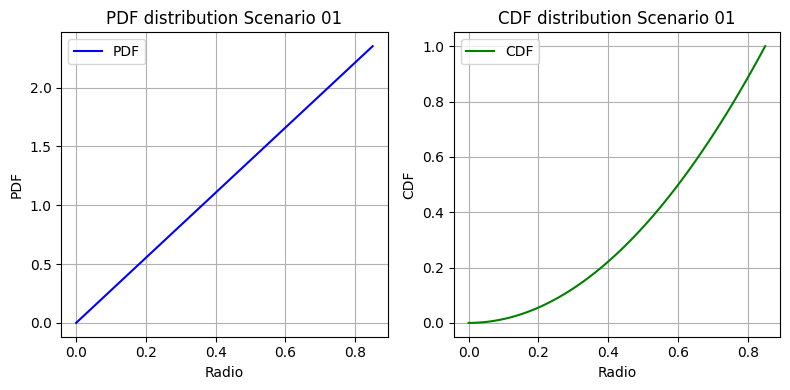

In [7]:
# Create plots for distributions
plt.figure(figsize=(8, 4))

# Plot PDF
plt.subplot(1, 2, 1)
plt.plot(x_values_caso_01, pdf_values_caso_01, label='PDF', color='blue')
plt.title('PDF distribution Scenario 01')
plt.xlabel('Radio')
plt.ylabel('PDF')
plt.grid(True)
plt.legend()

# Plot CDF
plt.subplot(1, 2, 2)
plt.plot(x_values_caso_01, cdf_values_caso_01, label='CDF', color='green')
plt.title('CDF distribution Scenario 01')
plt.xlabel('Radio')
plt.ylabel('CDF')
plt.grid(True)
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

## II. Segundo Caso

### Definición:

En el segundo caso, podemos observar una distribución uniforme por distancias. Esto significa que la distancia de los puntos desde el centro, en un área pequeña, es proporcional a la distancia de los puntos al centro en un área mayor.

In [8]:
# Modelado Analítico Segundo Caso
class UniformPointsByDistance():
  def __init__(self,x:np.ndarray, radius:float):
    self.x=x
    self.radius=radius
  def getPDF(self):
    return np.ones(len(self.x))/ self.radius
  def getCDF(self):
    return self.x/self.radius
  def getMean(self):
    return self.radius/2
  def getStd(self):
    return ((self.radius**2)/12) ** 0.5

### Ejemplo

In [9]:
x_values_caso_02= np.linspace(0, R, 100)
obj_caso_02=UniformPointsByDistance(x_values_caso_02,R)

## get PDF and CDF
pdf_values_caso_02=obj_caso_02.getPDF()
cdf_values_caso_02=obj_caso_02.getCDF()

## get Mean and STD
mean_value_caso_02=obj_caso_02.getMean()
std_value_caso_02=obj_caso_02.getStd()

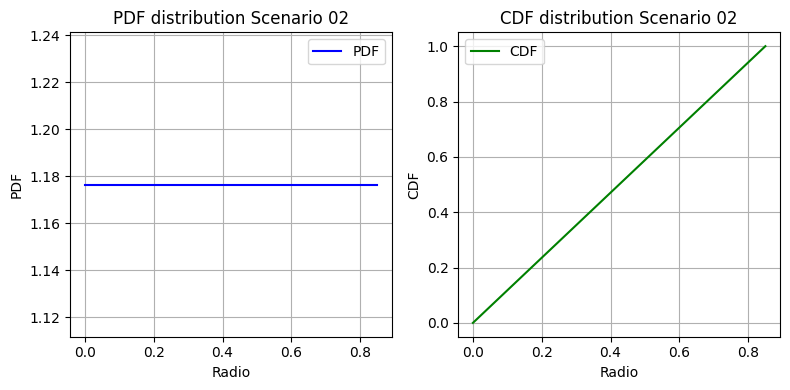

In [11]:
# Create plots for distributions
plt.figure(figsize=(8, 4))

# Plot PDF
plt.subplot(1, 2, 1)
plt.plot(x_values_caso_02, pdf_values_caso_02, label='PDF', color='blue')
plt.title('PDF distribution Scenario 02')
plt.xlabel('Radio')
plt.ylabel('PDF')
plt.grid(True)
plt.legend()

# Plot CDF
plt.subplot(1, 2, 2)
plt.plot(x_values_caso_02, cdf_values_caso_02, label='CDF', color='green')
plt.title('CDF distribution Scenario 02')
plt.xlabel('Radio')
plt.ylabel('CDF')
plt.grid(True)
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

In [ ]:
# PDF Modelos Analítico

def UniformPointsLocationPDF(x:np.ndarray, radius:float) -> np.ndarray:
    return (2 * x)/(radius ** 2)

def UniformPointsDistancePDF(x:np.ndarray, radius:float) -> np.ndarray:
    return np.ones(len(x))/ radius


# CDF Modelos Analítico
def UniformPointsLocationCDF(x:np.ndarray, radius:float) -> float:
    return x**2/radius**2

def UniformPointsDistanceCDF(x:np.ndarray, radius:float) -> float:
    return x/radius



# Média Modelos Analítico

def UniformPointsLocationMean(radius:float) -> float: ## caso 01
    return (2*radius)/3

def UniformPointsDistanceMean(radius:float) -> float: #caso 02
    return radius/2


# Desvio Padrão Modelos Analítico
def UniformPointsLocationStdDeviation(radius:float) -> float:
    return ((radius**2)/18) ** 0.5

def UniformPointsDistanceStdDeviation(radius:float) -> float:
    return ((radius**2)/12) ** 0.5

#4. Experimentación | Simulación de Montecarlo

##I. Primer Caso: Distribución de puntos por Area

### A. Definición

Crearemos la clase `MonteCarloSimulationByArea` para guardar la información de cada experimento

In [ ]:
class MonteCarloSimulationByArea():
  def __init__(self,radius, points):
    self.radius=radius
    self.points=points
    self.x=None
    self.y=None
    self.distances=None
    self.mean_distance=None
    self.std_distance=None
  def runSimluation(self):
    theta = 2 * np.pi * np.random.rand(self.points)
    rho = self.radius * np.sqrt(np.random.rand(self.points))
    self.x = rho * np.cos(theta)
    self.y = rho * np.sin(theta)

    # Calcular la distancia del centro al punto
    self.distances = np.sqrt(self.x**2 + self.y**2)

    # Calcular la media y desviación estandar de la distancia
    self.mean_distance = np.mean(self.distances)
    self.std_distance = np.std(self.distances)
    return self.x, self.y, self.distances, self.mean_distance, self.std_distance
  def plotHistAndPoints(self):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the histogram on the first subplot
    ax1.hist(self.distances, bins=30, density=True, alpha=0.6, color='g')
    ax1.set_title('Histograma das Distâncias')
    ax1.set_xlabel('Distância')
    ax1.set_ylabel('Densidade de Probabilidade')
    ax1.grid(True)

    # Plot the scatter plot on the second subplot
    ax2.scatter(self.x, self.y, color='red', alpha=0.6, edgecolors='w', s=50)
    circle = plt.Circle((centerX, centerY), R, color='blue', linestyle='dotted', fill=False, label='Unit Circle')
    ax2.add_artist(circle)
    ax2.set_xlim(-R, R)
    ax2.set_ylim(-R, R)
    ax2.set_aspect('equal', 'box')
    ax2.set_title('Uniform Random Points Inside a Unit Circle')
    ax2.set_xlabel('X-coordinate')
    ax2.set_ylabel('Y-coordinate')
    ax2.legend()

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

    # Show plots
    #plt.tight_layout()
    plt.show()



### B. Ejemplo

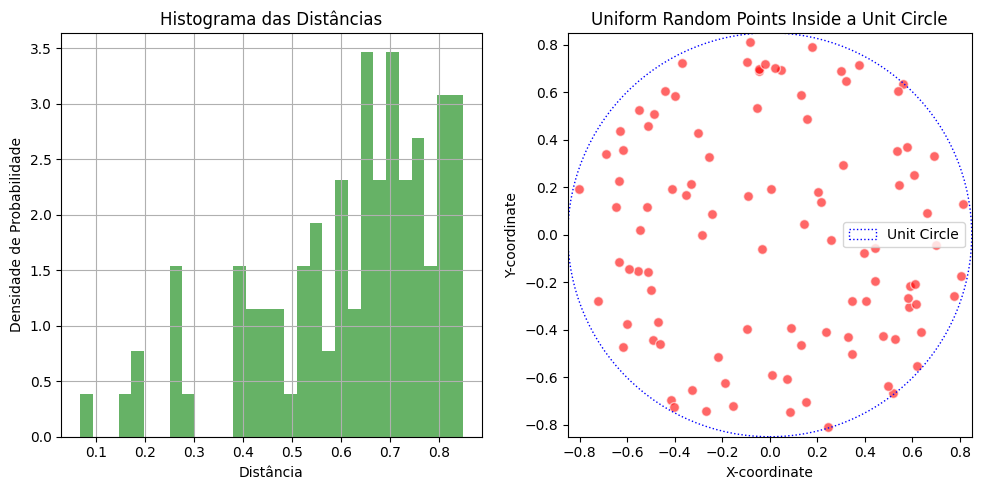

In [ ]:
#DEFINIMOS LA SIMULACIÓN
sim_01=MonteCarloSimulationByArea(radius=R, points=K)

## EJECUTAMOS LA SIMULACIÓN
sim_01.runSimluation()

## Graficamos el Histograma
sim_01.plotHistAndPoints()



### C. Ejecución de la simulación

En la experimentación, trabajaremos con 100 usuarios y repetiremos el proceso por `t_times` veces.

In [ ]:
iteraciones = [10**i for i in t_times]

In [ ]:
total_mean_caso_01={}
total_std_caso_01={}

for t in iteraciones:
  mean_t=[]
  std_t=[]
  for t_t in range(t):
      x_, y_, distances_caso01, mean_distance_caso01, std_distance_caso01= sim_01.runSimluation()
      mean_t.append(mean_distance_caso01)
      std_t.append(std_distance_caso01)
  total_mean_caso_01[f'media_{t}_veces_{K}_usuarios'] = sum(mean_t)/len(mean_t)
  total_std_caso_01[f'media_{t}_veces_{K}_usuarios'] = sum(std_t)/len(std_t)

In [ ]:
total_mean_caso_01

{'media_10_veces_100_usuarios': 0.5764834247593356,
 'media_100_veces_100_usuarios': 0.5653926705399441,
 'media_1000_veces_100_usuarios': 0.5663866244524658,
 'media_10000_veces_100_usuarios': 0.5667617299776312,
 'media_100000_veces_100_usuarios': 0.5666728837335507,
 'media_1000000_veces_100_usuarios': 0.5666141314404868}

In [ ]:
total_std_caso_01

{'media_10_veces_100_usuarios': 0.1942953118435014,
 'media_100_veces_100_usuarios': 0.1998136694290613,
 'media_1000_veces_100_usuarios': 0.19911688561324015,
 'media_10000_veces_100_usuarios': 0.19895289177090836,
 'media_100000_veces_100_usuarios': 0.198976125753986,
 'media_1000000_veces_100_usuarios': 0.19899155001348476}

### D. Comparación y resultados

In [ ]:
mean_value_montecarlo_caso_01 = sum(total_mean_caso_01.values())/len(total_mean_caso_01.values())

print(f"Media de la distribución por Montecarlo  = {mean_value_montecarlo_caso_01}")
print(f"Media de la distribución Analíticamente = {mean_value_caso_01}")

Media de la distribución por Montecarlo  = 0.5680519108172357
Media de la distribución Analíticamente = 0.5666666666666667


In [ ]:
std_value_montecarlo_caso_01 = sum(total_std_caso_01.values())/len(total_std_caso_01.values())

print(f"STD de la distribución por Montecarlo  = {std_value_montecarlo_caso_01}")
print(f"STD de la distribución Analíticamente = {std_value_caso_01}")

STD de la distribución por Montecarlo  = 0.19835773907069698
STD de la distribución Analíticamente = 0.20034692133618845


##I. Segundo Caso: Distribución de puntos por Distancia


### A. Definición:

Crearemos la clase `MonteCarloSimulationByDistance` para guardar la información de cada experimento

In [ ]:
class MonteCarloSimulationByDistance():
  def __init__(self,radius, points):
    self.radius=radius
    self.points=points
    self.x=None
    self.y=None
    self.distances=None
    self.mean_distance=None
    self.std_distance=None
  def runSimluation(self):
    theta = 2 * np.pi * np.random.rand(self.points)
    rho = self.radius * np.random.rand(self.points)
    self.x = rho * np.cos(theta)
    self.y = rho * np.sin(theta)

    # Calcular la distancia del centro al punto
    self.distances = np.sqrt(self.x**2 + self.y**2)

    # Calcular la media y desviación estandar de la distancia
    self.mean_distance = np.mean(self.distances)
    self.std_distance = np.std(self.distances)
    return self.x, self.y, self.distances, self.mean_distance, self.std_distance
  def plotHistAndPoints(self):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the histogram on the first subplot
    ax1.hist(self.distances, bins=30, density=True, alpha=0.6, color='g')
    ax1.set_title('Histograma das Distâncias')
    ax1.set_xlabel('Distância')
    ax1.set_ylabel('Densidade de Probabilidade')
    ax1.grid(True)

    # Plot the scatter plot on the second subplot
    ax2.scatter(self.x, self.y, color='red', alpha=0.6, edgecolors='w', s=50)
    circle = plt.Circle((centerX, centerY), R, color='blue', linestyle='dotted', fill=False, label='Unit Circle')
    ax2.add_artist(circle)
    ax2.set_xlim(-R, R)
    ax2.set_ylim(-R, R)
    ax2.set_aspect('equal', 'box')
    ax2.set_title('Uniform Random Points Inside a Unit Circle')
    ax2.set_xlabel('X-coordinate')
    ax2.set_ylabel('Y-coordinate')
    ax2.legend()

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

    # Show plots
    #plt.tight_layout()
    plt.show()

### B. Ejemplo

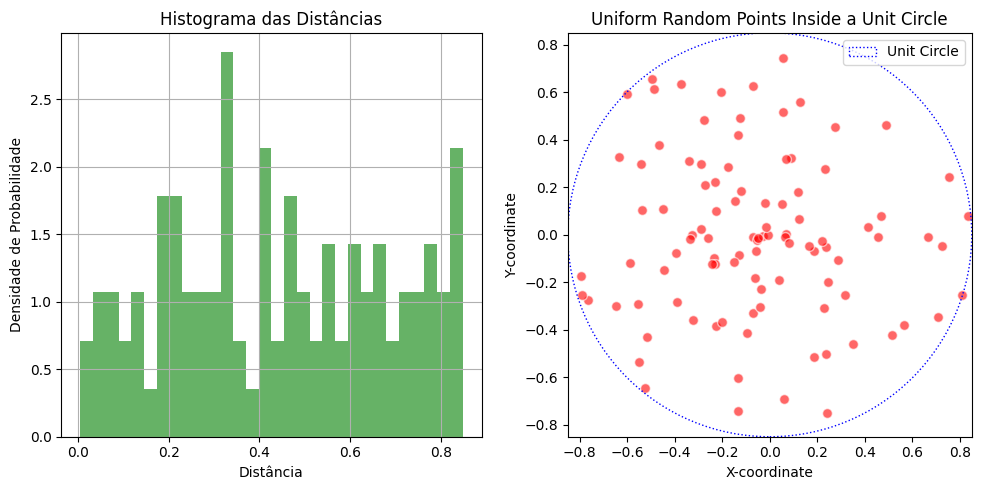

In [ ]:
#DEFINIMOS LA SIMULACIÓN
sim_02=MonteCarloSimulationByDistance(radius=R, points=K)

## EJECUTAMOS LA SIMULACIÓN
sim_02.runSimluation()

## Graficamos el Histograma y los puntos
sim_02.plotHistAndPoints()

### C. Ejecución de la simulación

In [ ]:
total_mean_caso_02={}
total_std_caso_02={}
for t in iteraciones:
  mean_t=[]
  std_t=[]
  for t_t in range(t):
      x_, y_, distances_caso02, mean_distance_caso02, std_distance_caso02= sim_02.runSimluation()
      mean_t.append(mean_distance_caso02)
      std_t.append(std_distance_caso02)
  total_mean_caso_02[f'media_{t}_veces_{K}_usuarios'] = sum(mean_t)/len(mean_t)
  total_std_caso_02[f'media_{t}_veces_{K}_usuarios'] = sum(std_t)/len(std_t)

###D. Comparación y resultados

In [ ]:
mean_value_montecarlo_caso_02 = sum(total_mean_caso_02.values())/len(total_mean_caso_02.values())

print(f"Media de la distribución por Montecarlo  = {mean_value_montecarlo_caso_02}")
print(f"Media de la distribución Analítico = {mean_value_caso_02}")

Media de la distribución por Montecarlo  = 0.426664422634923
Media de la distribución Analítico = 0.425


In [ ]:
std_value_montecarlo_caso_02 = sum(total_std_caso_02.values())/len(total_std_caso_02.values())

print(f"STD de la distribución por Montecarlo  = {std_value_montecarlo_caso_02}")
print(f"STD de la distribución Analítico = {std_value_caso_02}")

STD de la distribución por Montecarlo  = 0.24531694839582577
STD de la distribución Analítico = 0.24537386440559095


# Referencias Bibliográficas

In [ ]:
distribucion de distancias